In [1]:
import pandas as pd

In [2]:
def score(category):
    dict = {'18-22F' : 0.85556179, '23-45F' : 0.87431270, '46+F' : 0.83906224, '46+M' : 0.83220058, '23-45M' : 0.83609059, '18-22M' : 0.84184846}
    return dict[category]

def label(genders, ages, labels):
    yes = 0
    no = 0
    for i in range(0, 6):
        category = ages[i] + genders[i]
        if labels[i] == 'YES':
            yes += score(category)
        else:
            no += score(category)
    if yes > no:
        return 'YES'
    else:
        return 'NO'

In [3]:
#import training data for binary classification

#YES

train_yes = pd.read_json('training/EXIST2023_training.json')
train_yes=train_yes.transpose()
train_yes=train_yes.loc[train_yes['lang'].apply(lambda x:x=='en')]
train_yes=train_yes.loc[train_yes['labels_task1'].apply(lambda x:x.count('YES')>3)]
train_yes['label1']='YES'

#NO

train_no = pd.read_json('training/EXIST2023_training.json')
train_no=train_no.transpose()
train_no=train_no.loc[train_no['lang'].apply(lambda x:x=='en')]
train_no=train_no.loc[train_no['labels_task1'].apply(lambda x:x.count('NO')>3)]
train_no['label1']='NO'


train_amb = pd.read_json('training/EXIST2023_training.json')
train_amb=train_amb.transpose()
train_amb=train_amb.loc[train_amb['lang'].apply(lambda x:x=='en')]
train_amb=train_amb.loc[train_amb['labels_task1'].apply(lambda x:x.count('YES')==3)]
for i, sample in enumerate(train_amb.itertuples()):
    truelabel = label(sample[6], sample[7], sample[8])
    train_amb.at[sample[0], 'label1'] = truelabel


val_yes = pd.read_json('dev/EXIST2023_dev.json')
val_yes=val_yes.transpose()
val_yes=val_yes.loc[val_yes['lang'].apply(lambda x:x=='en')]
val_yes=val_yes.loc[val_yes['labels_task1'].apply(lambda x:x.count('YES')>3)]
val_yes['label1']='YES'

#NO
val_no = pd.read_json('dev/EXIST2023_dev.json')
val_no=val_no.transpose()
val_no=val_no.loc[val_no['lang'].apply(lambda x:x=='en')]
val_no=val_no.loc[val_no['labels_task1'].apply(lambda x:x.count('NO')>3)]
val_no['label1']='NO'



val_amb = pd.read_json('dev/EXIST2023_dev.json')
val_amb=val_amb.transpose()
val_amb=val_amb.loc[val_amb['lang'].apply(lambda x:x=='en')]
val_amb=val_amb.loc[val_amb['labels_task1'].apply(lambda x:x.count('YES')==3)]
for i, sample in enumerate(val_amb.itertuples()):
    truelabel = label(sample[6], sample[7], sample[8])
    val_amb.at[sample[0], 'label1'] = truelabel

In [4]:
frames = [train_yes, train_no,train_amb,val_yes,val_no,val_amb]
train = pd.concat(frames)
train.reset_index(drop=True)

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,label1
0,200002,en,Writing a uni essay in my local pub with a cof...,6,"[Annotator_391, Annotator_392, Annotator_393, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, NO, YES, YES]","[REPORTED, DIRECT, REPORTED, -, REPORTED, REPO...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION, MIS...",TRAIN_EN,YES
1,200003,en,@UniversalORL it is 2021 not 1921. I dont appr...,6,"[Annotator_397, Annotator_398, Annotator_399, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, NO, YES, NO, YES]","[REPORTED, REPORTED, -, REPORTED, -, JUDGEMENTAL]","[[OBJECTIFICATION, SEXUAL-VIOLENCE], [STEREOTY...",TRAIN_EN,YES
2,200006,en,According to a customer I have plenty of time ...,6,"[Annotator_409, Annotator_410, Annotator_411, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, REPORTED, REPORTED, REPORTED, REPOR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [S...",TRAIN_EN,YES
3,200007,en,"So only 'blokes' drink beer? Sorry, but if you...",6,"[Annotator_415, Annotator_416, Annotator_417, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[JUDGEMENTAL, REPORTED, REPORTED, DIRECT, DIRE...","[[STEREOTYPING-DOMINANCE], [STEREOTYPING-DOMIN...",TRAIN_EN,YES
4,200011,en,#EverydaySexism means women usually end up in ...,6,"[Annotator_437, Annotator_438, Annotator_439, ...","[F, F, M, M, M, F]","[18-22, 23-45, 18-22, 23-45, 46+, 46+]","[YES, YES, YES, YES, YES, YES]","[REPORTED, JUDGEMENTAL, JUDGEMENTAL, JUDGEMENT...","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",TRAIN_EN,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
3744,400435,en,@Conservativeind @Vixen95Trish ?? Wtf?Don’t st...,6,"[Annotator_795, Annotator_796, Annotator_797, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[NO, NO, YES, YES, YES, NO]","[-, -, DIRECT, REPORTED, REPORTED, -]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [STEREOTY...",DEV_EN,NO
3745,400439,en,Woman driving beside me a few minutes ago hold...,6,"[Annotator_780, Annotator_781, Annotator_782, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[YES, YES, NO, YES, NO, NO]","[DIRECT, JUDGEMENTAL, -, REPORTED, -, -]","[[STEREOTYPING-DOMINANCE], [MISOGYNY-NON-SEXUA...",DEV_EN,YES
3746,400454,en,@scopesotoscope @Acosta If you haven’t noticed...,6,"[Annotator_785, Annotator_786, Annotator_787, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[YES, NO, NO, NO, YES, YES]","[DIRECT, -, -, -, DIRECT, DIRECT]","[[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINAN...",DEV_EN,NO
3747,400465,en,Why did the white women have to be “BOUGIE” be...,6,"[Annotator_801, Annotator_182, Annotator_802, ...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 18-22, 23-45, 46+]","[YES, NO, NO, YES, NO, YES]","[REPORTED, -, -, JUDGEMENTAL, -, JUDGEMENTAL]","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",DEV_EN,NO


In [5]:
train_data = pd.DataFrame()
train_data['tweet'] = train['tweet']
train_data['label'] = train['label1']
train_data.reset_index(inplace=True, drop = True)
train_data

,tweet,label
0,Writing a uni essay in my local pub with a cof...,YES
1,@UniversalORL it is 2021 not 1921. I dont appr...,YES
2,According to a customer I have plenty of time ...,YES
3,"So only 'blokes' drink beer? Sorry, but if you...",YES
4,#EverydaySexism means women usually end up in ...,YES
...,...,...
3744,@Conservativeind @Vixen95Trish ?? Wtf?Don’t st...,NO
3745,Woman driving beside me a few minutes ago hold...,YES
3746,@scopesotoscope @Acosta If you haven’t noticed...,NO
3747,Why did the white women have to be “BOUGIE” be...,NO


In [6]:
validation = pd.read_json('test/EXIST2023_test_clean.json')
validation=validation.transpose()
validation=validation.loc[validation['lang'].apply(lambda x:x=='en')]
validation

,id_EXIST,lang,tweet,split
600001,600001,en,"@BrianRoemmele @profgalloway This is a BS, man...",TEST_EN
600002,600002,en,@Cathy_TwoHalves @EverydaySexism That's why wo...,TEST_EN
600003,600003,en,@betweenstardust Please be our voice.@CNN @cnn...,TEST_EN
600004,600004,en,"@JonPincince @kmulvane @EverydaySexism, even a...",TEST_EN
600005,600005,en,Seriously @JohnLewisRetail? girls are picture...,TEST_EN
...,...,...,...,...
600974,600974,en,@AllyMae99 This straight up sounds like “you l...,TEST_EN
600975,600975,en,Nathaniel is trying to help me with a new fake...,TEST_EN
600976,600976,en,walkin back from the gym &amp; an older lady s...,TEST_EN
600977,600977,en,You look like a whore of Babylon bc that’s the...,TEST_EN


In [7]:
validation_data = pd.DataFrame()
validation_data['tweet'] = validation['tweet']
validation_data.reset_index(inplace=True, drop = True)
validation_data

,tweet
0,"@BrianRoemmele @profgalloway This is a BS, man..."
1,@Cathy_TwoHalves @EverydaySexism That's why wo...
2,@betweenstardust Please be our voice.@CNN @cnn...
3,"@JonPincince @kmulvane @EverydaySexism, even a..."
4,Seriously @JohnLewisRetail? girls are picture...
...,...
973,@AllyMae99 This straight up sounds like “you l...
974,Nathaniel is trying to help me with a new fake...
975,walkin back from the gym &amp; an older lady s...
976,You look like a whore of Babylon bc that’s the...


In [8]:
#clean text

import nltk
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

def text_preprocess(ds: pd.Series) -> pd.Series:
    
    for m in range(len(ds)):
        
        main_words = re.sub('[^a-zA-Z]', ' ', ds[m])                                      # Retain only alphabets
        main_words = (main_words.lower()).split()
        main_words = [w.lower() for w in main_words if not w in set(stopwords.words('english'))]  # Remove stopwords
        
        lem = WordNetLemmatizer()
        main_words = [lem.lemmatize(w) for w in main_words if len(w) > 1]                 # Group different forms of the same word
        
        main_words = ' '.join(main_words)
        ds[m] = main_words

    return ds

[nltk_data] Downloading package stopwords to /home/kelkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kelkar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kelkar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
ser = pd.Series(train_data['tweet'])
#create new variable with cleaned text
train_data_cleaned = pd.DataFrame()
train_data_cleaned['tweet'] = text_preprocess(ser).values
train_data_cleaned['label'] = train_data['label']
train_data_cleaned

,tweet,label
0,writing uni essay local pub coffee random old ...,YES
1,universalorl dont appreciate two ride team mem...,YES
2,according customer plenty time go spent stirli...,YES
3,bloke drink beer sorry bloke drink wine appare...,YES
4,everydaysexism mean woman usually end lower pa...,YES
...,...,...
3744,conservativeind vixen trish wtf stress kimberl...,NO
3745,woman driving beside minute ago holding phone ...,YES
3746,scopesotoscope acosta noticed congressman woma...,NO
3747,white woman bougie want child exposed conversa...,NO


In [10]:
ser = pd.Series(validation_data['tweet'])
#create new variable with cleaned text
validation_data_cleaned = pd.DataFrame()
validation_data_cleaned['tweet'] = text_preprocess(ser).values
validation_data_cleaned

,tweet
0,brianroemmele profgalloway b manosphere commen...
1,cathy twohalves everydaysexism woman stay home...
2,betweenstardust please voice cnn cnnbrk cnnfra...
3,jonpincince kmulvane everydaysexism even roe w...
4,seriously johnlewisretail girl pictured stylis...
...,...
973,allymae straight sound like look like whore co...
974,nathaniel trying help new fake club name amp s...
975,walkin back gym amp older lady shout car look ...
976,look like whore babylon bc requirement church ...


In [11]:
def tokenize_sent(sent):
    return [word for word in sent.split(" ")]


In [12]:
train_data_cleaned['tweet'] = train_data_cleaned['tweet'].apply(tokenize_sent)
train_data_cleaned

,tweet,label
0,"[writing, uni, essay, local, pub, coffee, rand...",YES
1,"[universalorl, dont, appreciate, two, ride, te...",YES
2,"[according, customer, plenty, time, go, spent,...",YES
3,"[bloke, drink, beer, sorry, bloke, drink, wine...",YES
4,"[everydaysexism, mean, woman, usually, end, lo...",YES
...,...,...
3744,"[conservativeind, vixen, trish, wtf, stress, k...",NO
3745,"[woman, driving, beside, minute, ago, holding,...",YES
3746,"[scopesotoscope, acosta, noticed, congressman,...",NO
3747,"[white, woman, bougie, want, child, exposed, c...",NO


In [13]:
validation_data_cleaned['tweet'] = validation_data_cleaned['tweet'].apply(tokenize_sent)
validation_data_cleaned

,tweet
0,"[brianroemmele, profgalloway, b, manosphere, c..."
1,"[cathy, twohalves, everydaysexism, woman, stay..."
2,"[betweenstardust, please, voice, cnn, cnnbrk, ..."
3,"[jonpincince, kmulvane, everydaysexism, even, ..."
4,"[seriously, johnlewisretail, girl, pictured, s..."
...,...
973,"[allymae, straight, sound, like, look, like, w..."
974,"[nathaniel, trying, help, new, fake, club, nam..."
975,"[walkin, back, gym, amp, older, lady, shout, c..."
976,"[look, like, whore, babylon, bc, requirement, ..."


In [14]:
print(max(train_data_cleaned['tweet'].apply(len)))
print(max(validation_data_cleaned['tweet'].apply(len)))

74
39


In [15]:
from gensim.models import KeyedVectors


In [16]:
model = KeyedVectors.load_word2vec_format('cc.en.300.vec', binary=False)

In [17]:
model

In [18]:
def vectorize_tweet(tweet):
    vec = []
    for word in tweet:
        if word in model.key_to_index:
            vec.append(model[word])
    return vec

In [19]:
train_data_cleaned['tweet'] = train_data_cleaned['tweet'].apply(vectorize_tweet)
validation_data_cleaned['tweet'] = validation_data_cleaned['tweet'].apply(vectorize_tweet)

In [20]:
print(max(train_data_cleaned['tweet'].apply(len)))
print(max(validation_data_cleaned['tweet'].apply(len)))

41
37


In [21]:
train_data_cleaned

,tweet,label
0,"[[-0.0066, 0.0245, 0.0565, 0.0465, 0.0555, -0....",YES
1,"[[-0.0501, -0.0011, 0.0076, 0.1342, -0.2558, -...",YES
2,"[[-0.0131, 0.1091, -0.0101, 0.0115, -0.0078, -...",YES
3,"[[0.0321, -0.0022, -0.0269, 0.0756, -0.0477, -...",YES
4,"[[0.0507, 0.0088, 0.0209, 0.0685, -0.0894, -0....",YES
...,...,...
3744,"[[-0.0187, -0.0039, -0.0262, 0.0728, 0.0625, 0...",NO
3745,"[[0.1328, -0.0516, 0.0142, 0.0771, -0.061, -0....",YES
3746,"[[0.0277, 0.0675, -0.0805, -0.026, 0.0093, -0....",NO
3747,"[[0.0362, -0.0423, -0.0368, 0.05, -0.0251, -0....",NO


In [22]:
validation_data_cleaned

,tweet
0,"[[0.0185, -0.686, -0.1796, -0.2684, -0.0892, -..."
1,"[[-0.0088, -0.0179, 0.0676, 0.0176, 0.1107, -0..."
2,"[[0.0356, -0.0126, 0.0676, 0.0512, 0.0242, -0...."
3,"[[0.0162, -0.0508, -0.082, 0.0862, -0.0712, -0..."
4,"[[0.0101, -0.0311, -0.003, 0.0694, -0.0385, -0..."
...,...
973,"[[-0.0126, 0.0223, 0.0133, 0.0771, -0.0081, -0..."
974,"[[-0.0326, -0.0134, 0.0297, 0.0681, 0.0857, -0..."
975,"[[0.0969, -0.0522, -0.0979, 0.0651, -0.075, 0...."
976,"[[0.0555, 0.0124, 0.1839, 0.0747, -0.0767, -0...."


In [23]:
import random

X_train = list(train_data_cleaned['tweet'])
Y_train = list(train_data_cleaned['label'])

X_test = list(validation_data_cleaned['tweet'])
temp = list(zip(X_train, Y_train))
random.shuffle(temp)
X_train, Y_train = zip(*temp)
X_train = list(X_train)
Y_train = list(Y_train)

In [24]:
import tensorflow as tf

2023-05-05 17:12:39.708000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 17:12:39.863849: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 17:12:39.865175: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 17:12:40.725411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [25]:
def padto39(x):
    if len(x) < 41:
        for i in range(41 - len(x)):
            x.append([0]*300)
    return x

In [26]:
for i in range(len(X_train)):
    X_train[i] = padto39(X_train[i])

for i in range(len(X_test)):
    X_test[i] = padto39(X_test[i])

In [27]:
X_train_tensor = tf.convert_to_tensor(X_train)
X_test_tensor = tf.convert_to_tensor(X_test)

2023-05-05 17:12:46.008838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-05 17:12:46.010863: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-05 17:12:46.017016: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184450800 exceeds 10% of free system memory.
2023-05-05 17:12:48.330416: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 48117600 exceeds 10% of free sy

In [28]:
print(tf.shape(X_train_tensor))
print(tf.shape(X_test_tensor))

tf.Tensor([3749   41  300], shape=(3,), dtype=int32)
tf.Tensor([978  41 300], shape=(3,), dtype=int32)


In [29]:
#convert yes to 1 and no to 0
for i in range(len(Y_train)):
    if Y_train[i] == 'YES':
        Y_train[i] = [1, 0]
    else:
        Y_train[i] = [0, 1]


In [30]:
Y_train_tensor = tf.convert_to_tensor(Y_train)

In [31]:
MLmodel = tf.keras.Sequential([
    tf.keras.layers.LSTM(150),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])
MLmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
MLmodel.build(input_shape=(None, 41, 300))
MLmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               270600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 32)                4832      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 275,498
Trainable params: 275,498
Non-trainable params: 0
_________________________________________________________________


2023-05-05 17:12:49.352506: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:12:49.353610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:12:49.354461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [32]:
num_epochs = 6
MLmodel.fit(X_train_tensor, Y_train_tensor, epochs=num_epochs)

Epoch 1/6


2023-05-05 17:12:49.664696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:12:49.666041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:12:49.667083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

118/118 [==============================] - 4s 19ms/step - loss: 0.6263 - accuracy: 0.6668
Epoch 2/6
118/118 [==============================] - 2s 19ms/step - loss: 0.5505 - accuracy: 0.7322
Epoch 3/6
118/118 [==============================] - 2s 19ms/step - loss: 0.5292 - accuracy: 0.7586
Epoch 4/6
118/118 [==============================] - 2s 19ms/step - loss: 0.5072 - accuracy: 0.7666
Epoch 5/6
118/118 [==============================] - 2s 18ms/step - loss: 0.4908 - accuracy: 0.7759
Epoch 6/6
118/118 [==============================] - 2s 19ms/step - loss: 0.4909 - accuracy: 0.7815


In [33]:
accuracy = MLmodel.history.history["accuracy"]


In [34]:
loss = MLmodel.history.history["loss"]


In [35]:
import matplotlib.pyplot as plt


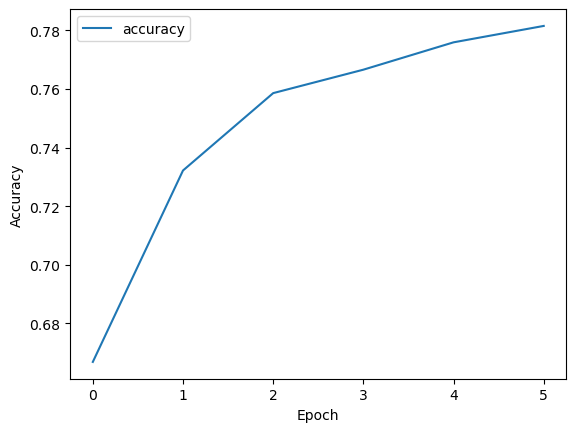

In [36]:
plt.plot(accuracy, label="accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()


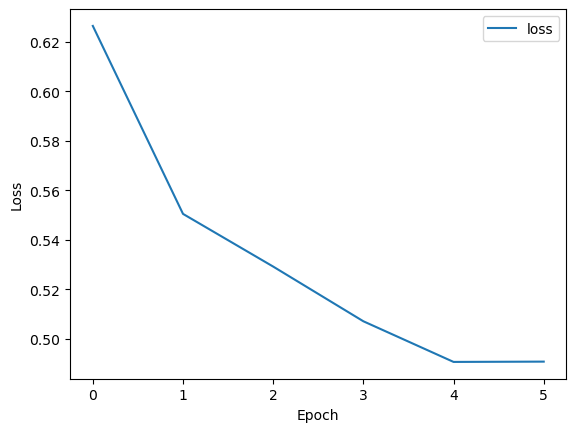

In [38]:
plt.plot(loss, label="loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [40]:
y_pred = MLmodel.predict(X_test_tensor)

 7/31 [=====>........................] - ETA: 0s

2023-05-05 17:13:53.334046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 17:13:53.335100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 17:13:53.335827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

31/31 [==============================] - 0s 8ms/step


In [41]:
y_pred

array([[0.1885391 , 0.811461  ],
       [0.75149083, 0.24850918],
       [0.07494411, 0.925056  ],
       ...,
       [0.72209275, 0.27790734],
       [0.538724  , 0.461276  ],
       [0.7017082 , 0.29829177]], dtype=float32)

In [42]:
final=[]
for row in y_pred:
    if row[0]>row[1]:
        final.append("YES")
    else:
        final.append("NO")

In [43]:
print('Shape of y_pred:', len(final))

Shape of y_pred: 978


In [44]:
result_dict = {}
val_id=validation['id_EXIST'].to_list() 
for i in range(978):
    

    temp={"hard_label":final[i]}
    result_dict[val_id[i]]=temp
    

In [45]:
myKeys = list(result_dict.keys())
myKeys.sort()
result = {i: result_dict[i] for i in myKeys}
 

In [46]:
import json

result_json = json.dumps(result)

In [47]:
result_json

'{"600001": {"hard_label": "NO"}, "600002": {"hard_label": "YES"}, "600003": {"hard_label": "NO"}, "600004": {"hard_label": "NO"}, "600005": {"hard_label": "NO"}, "600006": {"hard_label": "NO"}, "600007": {"hard_label": "NO"}, "600008": {"hard_label": "NO"}, "600009": {"hard_label": "NO"}, "600010": {"hard_label": "YES"}, "600011": {"hard_label": "NO"}, "600012": {"hard_label": "NO"}, "600013": {"hard_label": "YES"}, "600014": {"hard_label": "NO"}, "600015": {"hard_label": "YES"}, "600016": {"hard_label": "NO"}, "600017": {"hard_label": "NO"}, "600018": {"hard_label": "NO"}, "600019": {"hard_label": "YES"}, "600020": {"hard_label": "YES"}, "600021": {"hard_label": "NO"}, "600022": {"hard_label": "NO"}, "600023": {"hard_label": "YES"}, "600024": {"hard_label": "NO"}, "600025": {"hard_label": "NO"}, "600026": {"hard_label": "YES"}, "600027": {"hard_label": "YES"}, "600028": {"hard_label": "NO"}, "600029": {"hard_label": "YES"}, "600030": {"hard_label": "YES"}, "600031": {"hard_label": "Y